# FRAUD CHECK DATASET
Using the above dataset to build a Model using Decision Tree and Random Forest Classifier to predict whether it is fraud. 

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect entry


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                | **Type** | **Relevance** |
|:--------:|:--------------------|:-----------------------------------------------|:--------:|:-------------:|
| 1        | Undergrad           | UnderGraduation Completed : Yes or No          | Binary   | Relevant      |
| 2        | Marital.Status      | Marital Status : Single or Married or Divorced | Nominal  | Relevant      |
| 3        | Taxable.Income      | The base income upon which tax is levied       | Ratio    | Relevant      |
| 4        | City.Population     | The population of the city                     | Ratio    | Relevant      |
| 5        | Work.Experience     | Work Experience                                | Ratio    | Relevant      |
| 6        | Urban               | Urban Locality : Yes or No                     | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass16\Fraud_check.csv")
df=df0.copy()
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(600, 6)

In [4]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Taxable.Income      55208.375000
City.Population    108747.368333
Work.Experience        15.558333
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Taxable.Income      55074.5
City.Population    106493.5
Work.Experience        15.0
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['YES', 'Single', 59689, 57194, 10, 'YES']], dtype=object), count=array([[312, 217,   2,   2,  31, 302]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Taxable.Income     6.866930e+08
City.Population    2.485030e+09
Work.Experience    7.818357e+01
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Taxable.Income     26204.827597
City.Population    49850.075134
Work.Experience        8.842147
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_23916\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

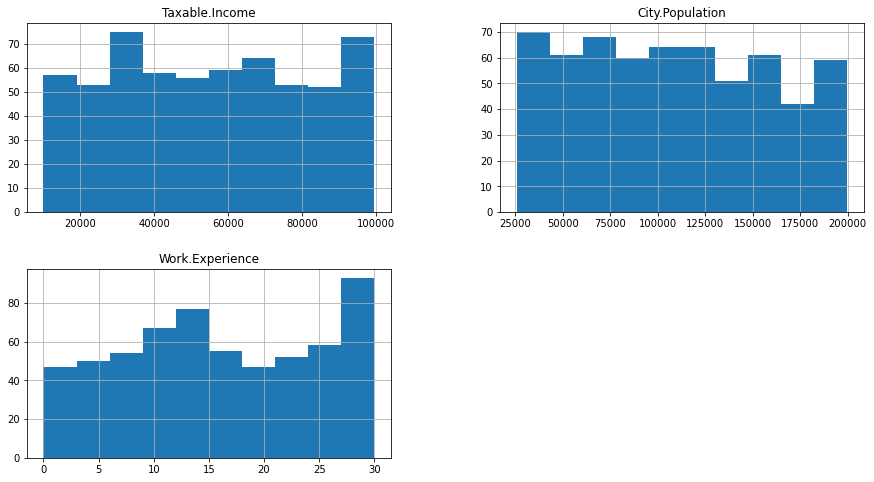

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


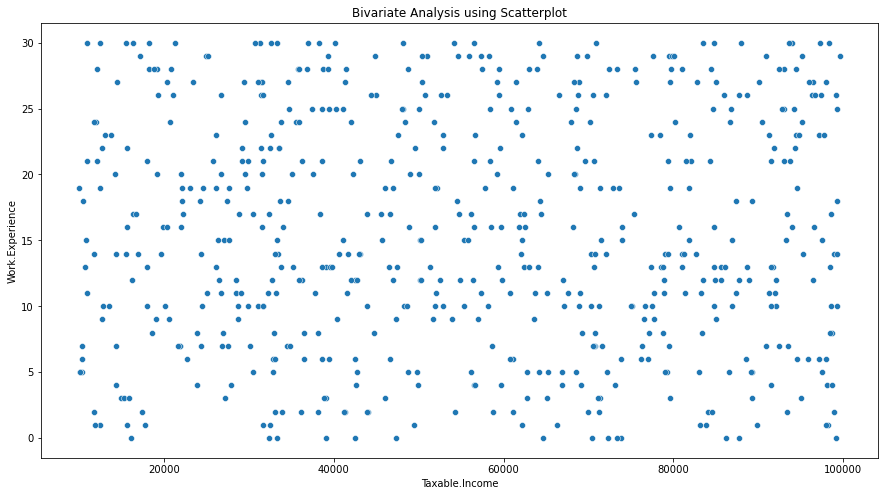

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Taxable.Income'],df['Work.Experience'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [20]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

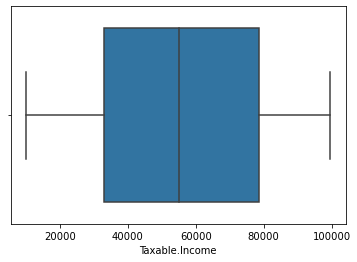

In [21]:
sns.boxplot(df["Taxable.Income"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

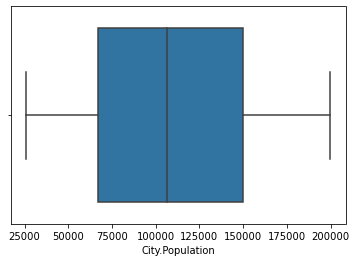

In [22]:
sns.boxplot(df['City.Population'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience'>

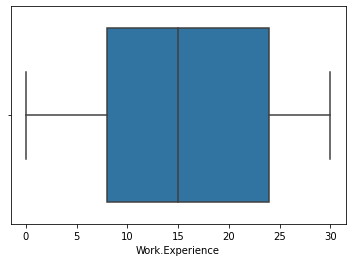

In [23]:
sns.boxplot(df['Work.Experience'])

from the boxplots it is clear that there are no outliers in the continuous variables.

Discretizing the the target variable ('Taxable.Income') as continuous data cannot be used for classification.

In [28]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Good' if x <= 30000 else 'Risky')
df.head()

In [30]:
df['Taxable.Income'].value_counts()

Risky    476
Good     124
Name: Taxable.Income, dtype: int64

Label encoding the categorical values of the independent variables.

In [31]:
lb = LabelEncoder()
df['Undergrad'] = lb.fit_transform(df['Undergrad'])
df['Marital.Status'] = lb.fit_transform(df['Marital.Status'])
df['Urban'] = lb.fit_transform(df['Urban'])
df.dtypes

Undergrad           int32
Marital.Status      int32
Taxable.Income     object
City.Population     int64
Work.Experience     int64
Urban               int32
dtype: object

### MODEL BUILDING

Splitting the data in to dependent and independent variable.

In [32]:
X=df.drop(['Taxable.Income'],axis=1)
Y=df['Taxable.Income']

Splitting the X and Y data into train and test dataset using train_test_split function.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Assigning the column names to cols.

In [34]:
cols=X.columns

Scaling the train and test data of the independent variables.

In [35]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [36]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.0,-0.5,1.126060,-0.266667,-1.0
1,0.0,-0.5,-0.360451,0.200000,0.0
2,0.0,0.5,-0.187140,0.133333,0.0
3,-1.0,-0.5,-0.051658,1.000000,-1.0
4,0.0,0.5,-0.579636,0.200000,-1.0


In [37]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,0.5,-0.329434,0.150943,0.0
1,0.0,0.0,0.313626,0.679245,-1.0
2,-1.0,0.0,-0.707188,0.603774,0.0
3,0.0,0.0,-0.547809,0.301887,-1.0
4,-1.0,0.0,0.207326,0.226415,0.0


Creating a Decision Tree classifier object with criterion as entropy

In [38]:
model = DT(criterion='entropy',random_state=0) 

Training the classifier on the train data. 

In [39]:
model.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the test data

In [40]:
preds = model.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [41]:
accuracy_score(Y_test, preds)

0.625

In [42]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,Good,Risky
Actual,,
Good,9,16
Risky,29,66


Evaluating the train data

In [43]:
preds1=model.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the train data. 

In [44]:
accuracy_score(Y_train,preds1)

1.0

In [45]:
pd.crosstab(Y_train,preds1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,Good,Risky
Actual,,
Good,99,0
Risky,0,381


### HYPERPARAMETER TUNING OF DECISION TREE CLASSIFIER

Loading the gridsearchcv function from sklearn library. 

In [46]:
from sklearn.model_selection import GridSearchCV

Declaring the parameters

In [47]:
param_grid = {'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': [2, 4, 6, 8, 10],
              'max_features': ['sqrt']}

Creating a GridSearchCV object. 

In [48]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 4, 
                                refit=True, return_train_score=True)

Training the GridSearchCV on train data. 

In [49]:
grid_search.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

The best parameters for the classifier.

In [50]:
best_parameters=grid_search.best_params_
best_parameters

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5}

Creating the estimator based on the best parameters. 

In [51]:
cv_dt_clf_grid = grid_search.best_estimator_

Evaluating the test data. 

In [52]:
accuracy_score(Y_test, cv_dt_clf_grid.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7916666666666666

In [53]:
pd.crosstab(Y_test, cv_dt_clf_grid.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,Risky
Actual,
Good,25
Risky,95


Evaluating the train data. 

In [54]:
accuracy_score(Y_train, cv_dt_clf_grid.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.79375

In [55]:
pd.crosstab(Y_train, cv_dt_clf_grid.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,Risky
Actual,
Good,99
Risky,381


### RANDOM FOREST CLASSIFIER
Loading the Random forest classifier from sklearn library. 

In [56]:
from sklearn.ensemble import RandomForestClassifier

Creating the classifier object

In [57]:
rf_classifier=RandomForestClassifier(n_estimators=100)

Training the classifier on the train data. 

In [58]:
rf_classifier.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

Evaluating the test data

In [59]:
preds_rf =rf_classifier.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [60]:
accuracy_score(Y_test,preds_rf)

0.75

In [61]:
pd.crosstab(Y_test,preds_rf, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,Good,Risky
Actual,,
Good,0,25
Risky,5,90


Evaluating the train data

In [62]:
preds_rf1=rf_classifier.predict(X_train)
accuracy_score(Y_train,preds_rf1)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [63]:
pd.crosstab(Y_train,preds_rf1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,Good,Risky
Actual,,
Good,99,0
Risky,0,381


### HYPERPARAMETER TUNING OF RANDOMFOREST CLASSIFIER
Creating the gridsearchcv object

In [64]:
grid_search_rf = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 4, 
                                refit=True, return_train_score=True)

Training the gridsearch object on the train data. 

In [65]:
grid_search_rf.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

Considering the estimator based on the best parameters. 

In [66]:
cv_dt_clf_grid_rf = grid_search_rf.best_estimator_

Evaluating the test data

In [67]:
accuracy_score(Y_test, cv_dt_clf_grid_rf.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7916666666666666

In [68]:
pd.crosstab(Y_test, cv_dt_clf_grid_rf.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,Risky
Actual,
Good,25
Risky,95


Evaluating the train data. 

In [69]:
accuracy_score(Y_train, cv_dt_clf_grid_rf.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.79375

In [70]:
pd.crosstab(Y_train, cv_dt_clf_grid_rf.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,Risky
Actual,
Good,99
Risky,381


### CONCLUSIONS

The vanilla models of both Decision Tree and Random forest classifier are not good as they are overfitting but on hyperparameter tuning of both the models we were able to address the overfitting condition but the accuracies were not good as they were less than 80%. So the best option is to go for some other methods. 